In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

In [2]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv')

In [3]:
set_train = train_values.merge(train_labels)
set_train.drop( columns=["building_id"], inplace=True)
set_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


Checkeamos la correlación entre las variables del set de datos

In [4]:
set_train_correlation = set_train.corr()

<AxesSubplot:>

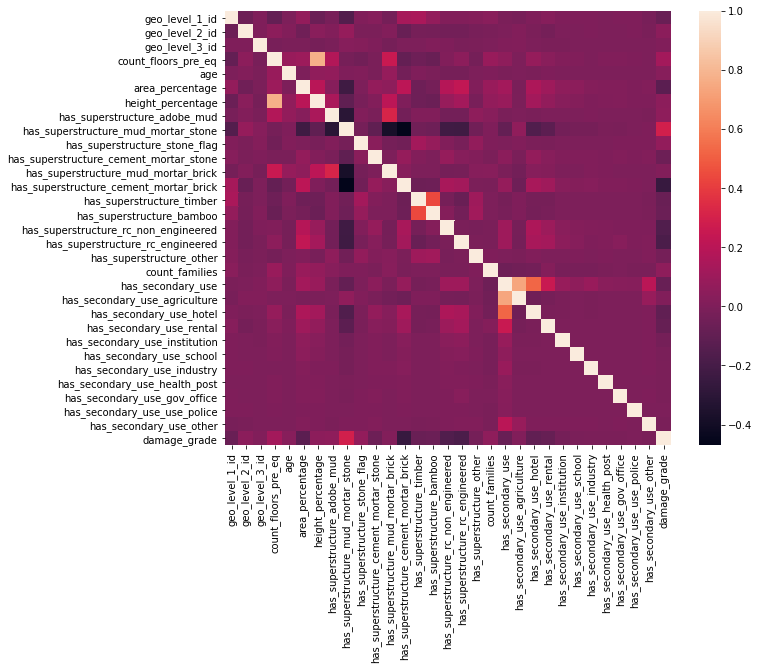

In [5]:
plot.figure(figsize=(10,8))
sns.heatmap(set_train_correlation)

Verificamos si tenemos algún valor nulo

In [6]:
set_train.isnull().any()

geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick    False
has_superstructure_timber               

Análisis de datos

In [7]:
set_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

Elimino las filas duplicadas, si es que las hay

In [8]:
len_inicial=len(set_train)
set_train=set_train.drop_duplicates(keep='last')
len_final = len(set_train)

Cantidad de filas duplicadas eliminadas

In [9]:
len_inicial-len_final

12319

Evaluamos como varian las categoricas numericas, para buscar datos que puedan
perturbar el analisis. (por lo tanto binario no se evalua, categorico tampoco)

Frecuencia de Geo Level 1, 2 y 3

<AxesSubplot:ylabel='Frequency'>

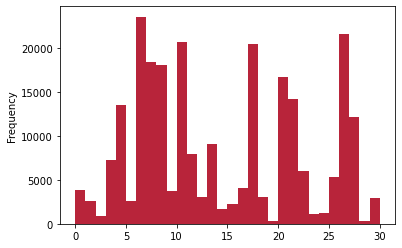

In [10]:
set_train['geo_level_1_id'].plot.hist(bins=30,color='#B8243A')

<AxesSubplot:ylabel='Frequency'>

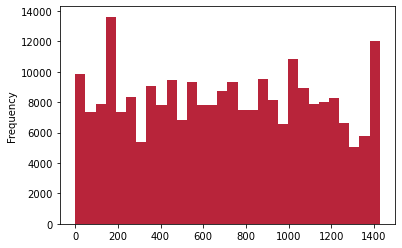

In [11]:
set_train['geo_level_2_id'].plot.hist(bins=30,color='#B8243A')

<AxesSubplot:ylabel='Frequency'>

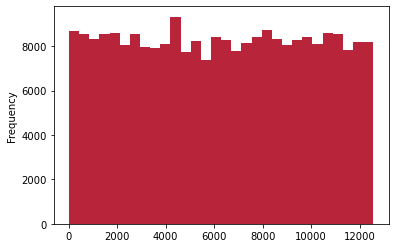

In [12]:
set_train['geo_level_3_id'].plot.hist(bins=30,color='#B8243A')

Frecuencia del Damage Grade

Text(0.5, 1.0, 'Distribución del Damage Grade')

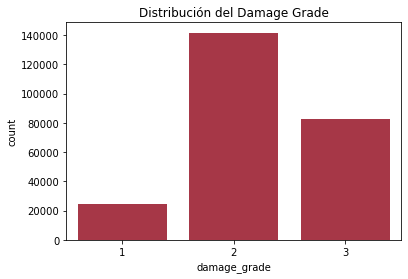

In [13]:
ax = sns.countplot(x=set_train['damage_grade'],color='#B8243A')
ax.set_title('Distribución del Damage Grade')

Frecuencia de los valores de la Edad

<AxesSubplot:>

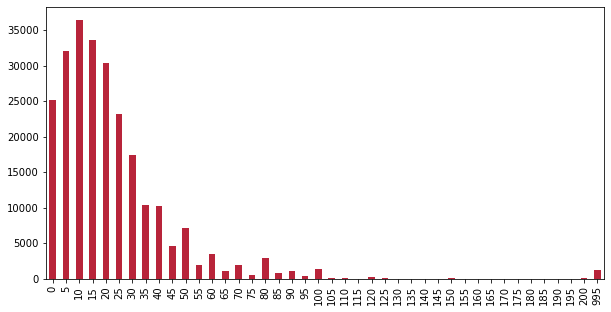

In [14]:
set_train['age'].value_counts().sort_index().plot.bar(color='#B8243A', figsize=(10,5))


Distribución del Damage Grade en construcciones con una edad igual o menor a 100

Frecuencia de la cantidad de pisos

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='count'>

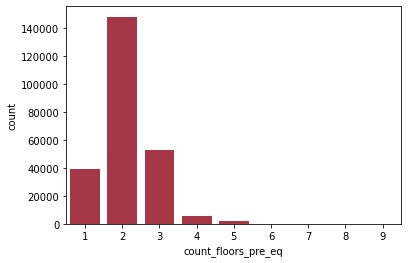

In [15]:
sns.countplot(x=set_train['count_floors_pre_eq'],color='#B8243A')

In [16]:
set_train['count_floors_pre_eq'].value_counts()

2    148307
3     52964
1     39244
4      5315
5      2203
6       208
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

Decidimos quedarnos con los datos que tienen una cantidad de pisos igual o menor a 5

In [17]:
set_train = set_train[set_train['count_floors_pre_eq'] <= 5]

Frecuencia de las variables del área

<AxesSubplot:>

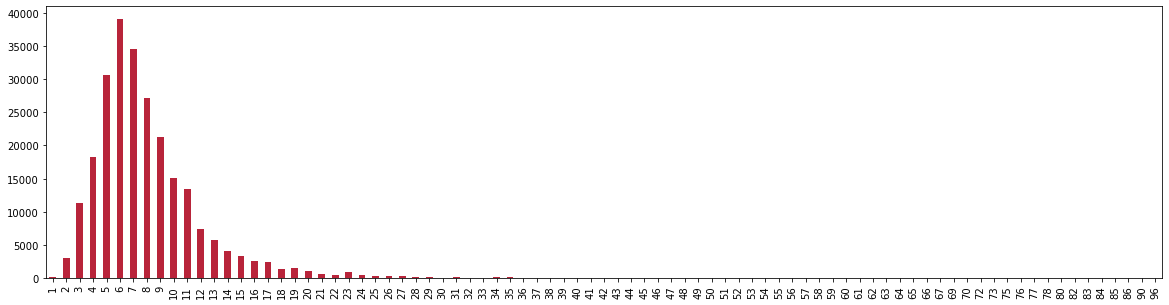

In [18]:
set_train['area_percentage'].value_counts().sort_index().plot.bar(color='#B8243A', figsize=(20,5))

Frecuencia de cantidad de familias, podemos observar que en la gran mayoría  de las construcciones vivía una sola familia

<AxesSubplot:>

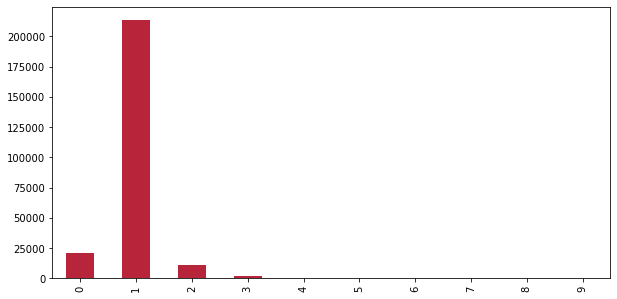

In [19]:
set_train['count_families'].value_counts().sort_index().plot.bar(color='#B8243A', figsize=(10,5))

Analizamos la distribución del damage grade para las diferentes variables de la cantidad de familias

<AxesSubplot:xlabel='count_families'>

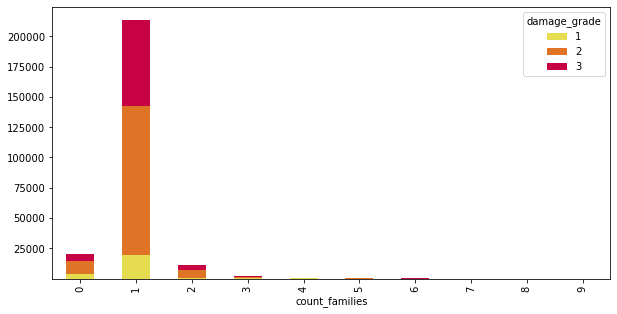

In [20]:
colores = ["#E6DC4F",
           "#DF7326",
           "#C70244"
          ]
a=set_train.groupby(['count_families','damage_grade']).size().reset_index()
b=a.pivot(index='count_families',columns='damage_grade',values=0).reset_index()
b.set_index('count_families',inplace=True)
b.plot(kind='bar',stacked=True, color = colores, figsize=(10,5))

Frecuencia de las variables de la altura de las construcciones

<AxesSubplot:>

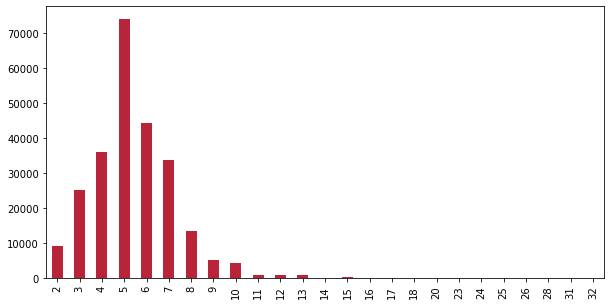

In [21]:
#set_train['height_percentage'].plot.hist(bins=30,color='#F2AB6D')
set_train['height_percentage'].value_counts().sort_index().plot.bar(color='#B8243A', figsize=(10,5))

Frecuencia y cantidad de construcciones que tenían algún uso secundario

<AxesSubplot:>

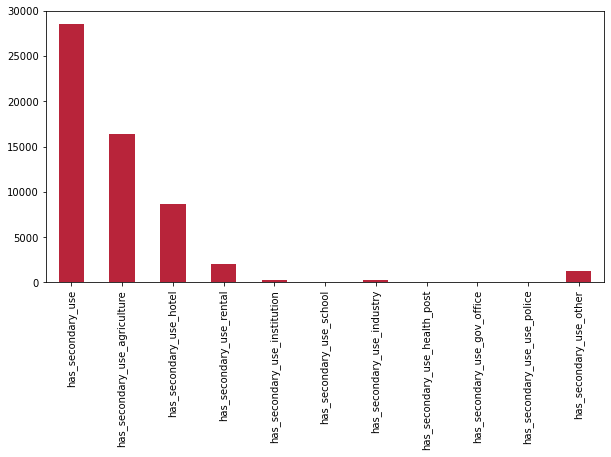

In [22]:
set_train.iloc[:, 27:38].sum().plot.bar(color='#B8243A', figsize=(10,5))
#plot.xticks(rotation=55)

<AxesSubplot:>

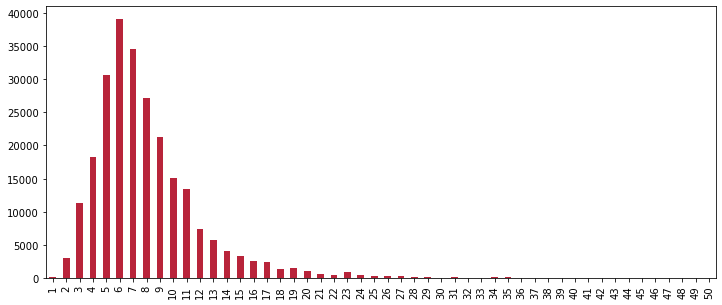

In [23]:
set_train.loc[set_train['area_percentage']<=50]['area_percentage'].value_counts().sort_index().plot.bar(color='#B8243A', figsize=(12,5))

Frecuencia y distribución del Damage Grade según la Altura de la construcción

<AxesSubplot:xlabel='height_percentage'>

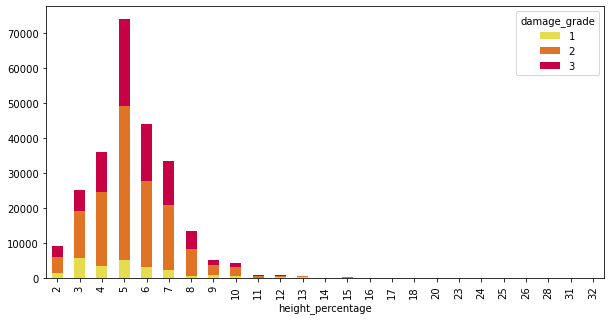

In [24]:
colores = ["#E6DC4F",
           "#DF7326",
           "#C70244"
          ]
a=set_train.groupby(['height_percentage','damage_grade']).size().reset_index()
b=a.pivot(index='height_percentage',columns='damage_grade',values=0).reset_index()
b.set_index('height_percentage',inplace=True)
b.plot(kind='bar',stacked=True, color = colores, figsize=(10,5))

Frecuencia y distribución del Damage Grade según el Área de la construcción

<AxesSubplot:xlabel='area_percentage'>

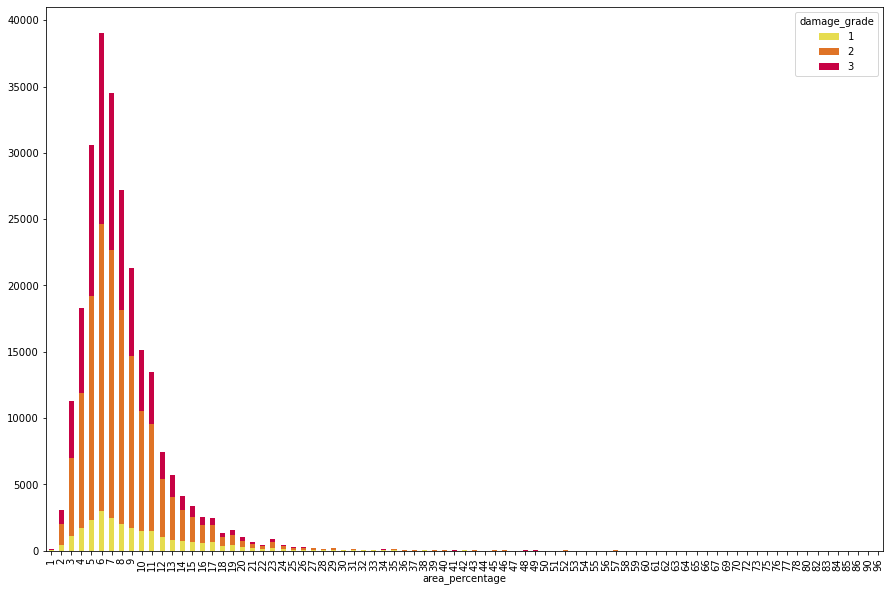

In [25]:
a=set_train.groupby(['area_percentage','damage_grade']).size().reset_index()
b=a.pivot(index='area_percentage',columns='damage_grade',values=0).reset_index()
b.set_index('area_percentage',inplace=True)
b.plot(kind='bar', stacked=True, color = colores, figsize=(15,10))

In [26]:
set_train.loc[set_train['age'] <= 50]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
5,8,558,6089,2,10,9,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
6,9,475,12066,2,25,3,4,n,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260593,8,767,8613,2,5,13,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
260595,8,268,4718,2,20,8,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
260597,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
260599,26,39,1851,2,10,14,6,t,r,x,...,0,0,0,0,0,0,0,0,0,2


Probabilidad de Damage Grade para cada Geo Level 1

Leyendo las probabilidades calculadas previamente

In [27]:
prob = pd.read_csv('probabilidades.csv')
probTest = pd.read_csv('probabilidadesTest.csv')
set_train['probabilidad1_geo1'] = prob['prob1_geo1']
set_train['probabilidad2_geo1'] = prob['prob2_geo1']
set_train['probabilidad3_geo1'] = prob['prob3_geo1']
probabilidad_damage_1 = set_train[['geo_level_1_id', 'probabilidad1_geo1']].drop_duplicates().sort_values('geo_level_1_id')
probabilidad_damage_2 = set_train[['geo_level_1_id', 'probabilidad2_geo1']].drop_duplicates().sort_values('geo_level_1_id')
probabilidad_damage_3 = set_train[['geo_level_1_id', 'probabilidad3_geo1']].drop_duplicates().sort_values('geo_level_1_id')

Probabilidad del grado de daño 1

<AxesSubplot:xlabel='geo_level_1_id'>

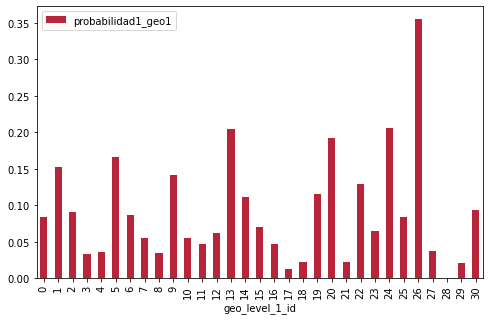

In [28]:
probabilidad_damage_1.plot(x="geo_level_1_id", y='probabilidad1_geo1', kind="bar",figsize=(8,5),color='#B8243A' )

Probabilidad del grado de daño 2

<AxesSubplot:xlabel='geo_level_1_id'>

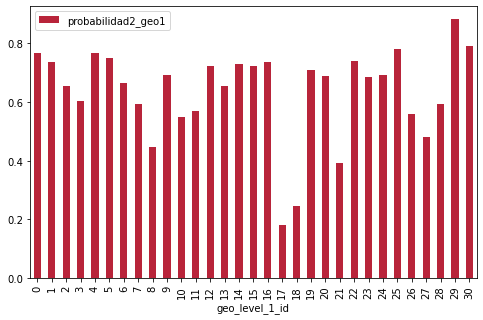

In [29]:
probabilidad_damage_2.plot(x="geo_level_1_id", y='probabilidad2_geo1', kind="bar",figsize=(8,5),color='#B8243A')

Probabilidad del grado de daño 3

<AxesSubplot:xlabel='geo_level_1_id'>

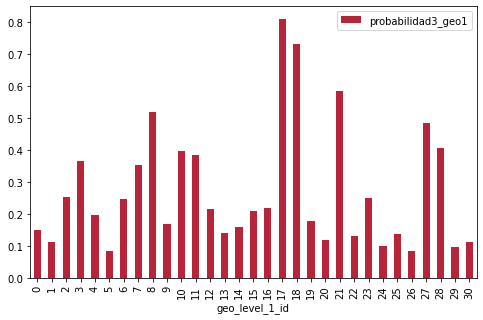

In [30]:
probabilidad_damage_3.plot(x="geo_level_1_id", y='probabilidad3_geo1', kind="bar",figsize=(8,5),color='#B8243A' )

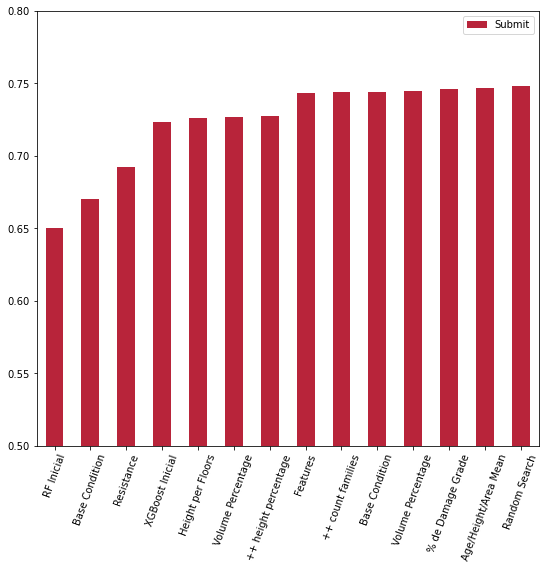

In [32]:
import matplotlib.pyplot as plt
data=[ ["RF Inicial",0.6499],
      ["Base Condition",0.6703],
      ["Resistance",0.6921],
      ["XGBoost Inicial", 0.7233],
      ["Height per Floors", 0.7257],
      ["Volume Percentage", 0.7266],
      ["++ height percentage", 0.7271],
      ["Features", 0.7434],
      ["++ count families", 0.7436],
      ["Base Condition", 0.7440],
      ["Volume Percentage", 0.7448],
      ["% de Damage Grade", 0.7459],
      ["Age/Height/Area Mean", 0.7467],
      ["Random Search", 0.7479]
     ]
df=pd.DataFrame(data,columns=["","Submit"])

df.plot(x="", y=["Submit"], kind="bar",figsize=(9,8), color='#B8243A')

plt.ylim(0.5, 0.8)
plt.xticks(rotation=70)
plt.show()